<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/Stacking_AdaBoost_Implement/Stacking_AdaBoost_Implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stacking Implement

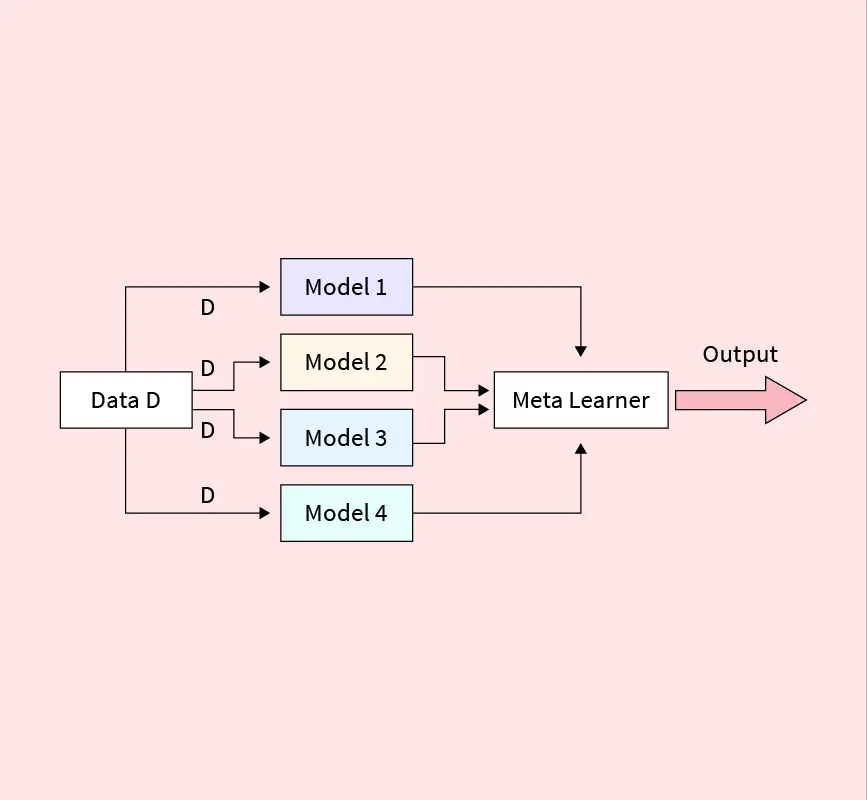

Stacking (or **Stacked Generalization**) is an **ensemble learning technique** where multiple base models are trained and their predictions are combined using a meta-model (or blender) to improve overall performance.




### **Steps to Implement Stacking in Machine Learning**

#### **1. Prepare the Dataset**

* Split the dataset into **training** and **testing** sets.
* Optionally, use **k-fold cross-validation** inside training to generate reliable predictions for the meta-model.



#### **2. Choose Base Models (Level-0 models)**

* Select multiple diverse models (e.g., Decision Tree, Logistic Regression, Random Forest, KNN, SVM, etc.).
* Train them independently on the training set.



#### **3. Generate Base Model Predictions**

* For each base model:

  * Use **k-fold cross-validation** on the training data.
  * Store the **out-of-fold predictions** (predictions on unseen folds).
* These predictions form a **new feature set** (meta-features).


#### **4. Train the Meta-Model (Level-1 model)**

* Use the meta-features (predictions of base models) as input.
* Train a **meta-learner** (often Logistic Regression, XGBoost, or a Neural Network).
* The meta-learner learns **how to combine base model outputs**.



#### **5. Make Final Predictions**

* On the test set:

  * Get predictions from each base model.
  * Feed them into the meta-model.
  * Meta-model gives the final prediction.



### **Advantages of Stacking**

* Combines strengths of different models.
* Usually outperforms individual models or simple ensembles (bagging/boosting).
* Works well with diverse base models.



### **When to Use**

* When base models perform **differently** (not highly correlated).
* When you want to squeeze out extra accuracy in competitions (e.g., Kaggle).




In [1]:
# import package

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

In [9]:
# load dataset from sklearn
data = load_breast_cancer()
X = data.data
y = data.target


df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [27]:
# Data split into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=44)

In [28]:
# display the value counts to understand the data balanced or unbalanced
print(pd.Series(y_train).value_counts())

1    282
0    173
Name: count, dtype: int64


In [29]:
# Define the Base learners
base_learners = [
    ('dt', DecisionTreeClassifier(random_state=44)),
    ('lr', LogisticRegression(random_state=44)),
    ('knn', KNeighborsClassifier())
]

In [30]:
# Define the Meta Learner
meta_learner = DecisionTreeClassifier(random_state=44)

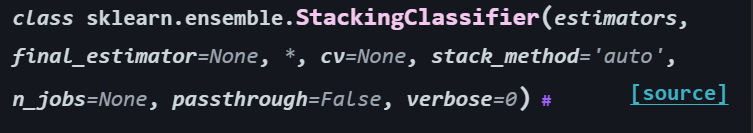

In [32]:
# Build and Fit the Stacking Classifer
stack_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner
)

stack_clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=44)),
                               ('lr', LogisticRegression(random_state=44)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=DecisionTreeClassifier(random_state=44))